# Interaction analysis with miss-specified model

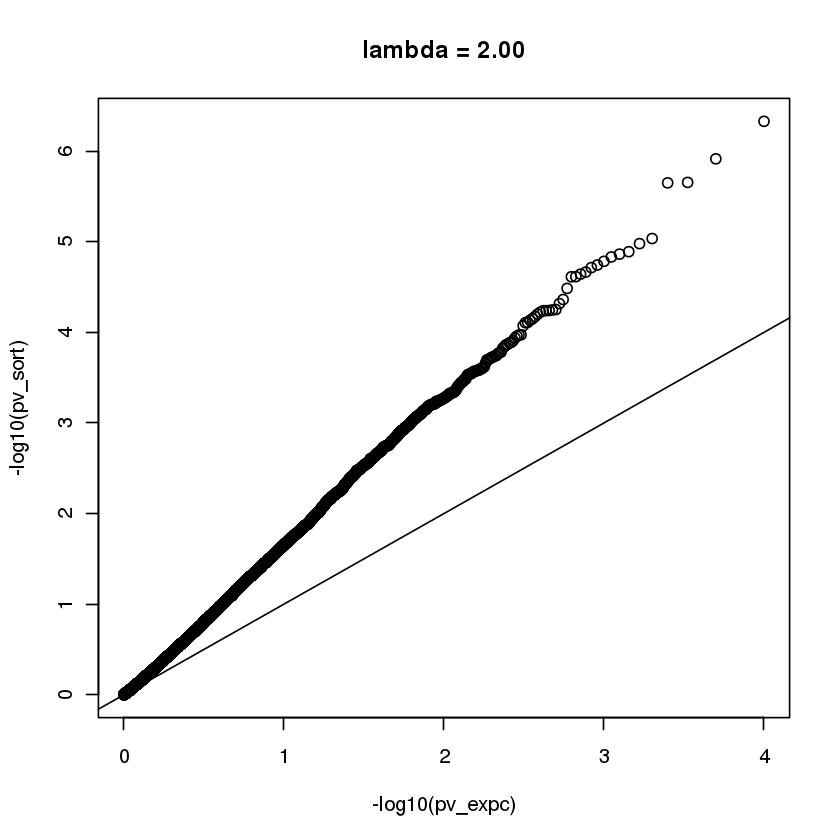

In [1]:
library(parallel)
n = 100 # number of tests
b0 = 30
b1 = 1
b2 = -1
b3 = -0.05
x1 = rnorm(n, 0.7, 9)
x2 = rnorm(n, 30, 10)
test.func = function(i){
  e = rbinom(n, 2, 0.3)
  y = b0 + b1 * x1 + b2 * x2 + b3 * (x2-30)^2 + rnorm(n, 0, 12)
  m1= summary(lm(y ~ x1 + x2 * e ))
  pv_intraction = m1$coefficients[5,4] # pvalue for interaction
  return (pv_intraction)  
}

N_test = 10000
test = mclapply(1:N_test, test.func, mc.cores = 2) # can use mc.cores > 1 if not windows.
pv_sort = sort(do.call(rbind, test))
pv_expc = (1:N_test)/N_test
plot(-log10(pv_expc), -log10(pv_sort))
abline(0, 1)
lambda = qchisq(1-median(pv_sort),1) / qchisq(1-median(0.5),1)
title(sprintf("lambda = %.2f", lambda))

# Robust estimator

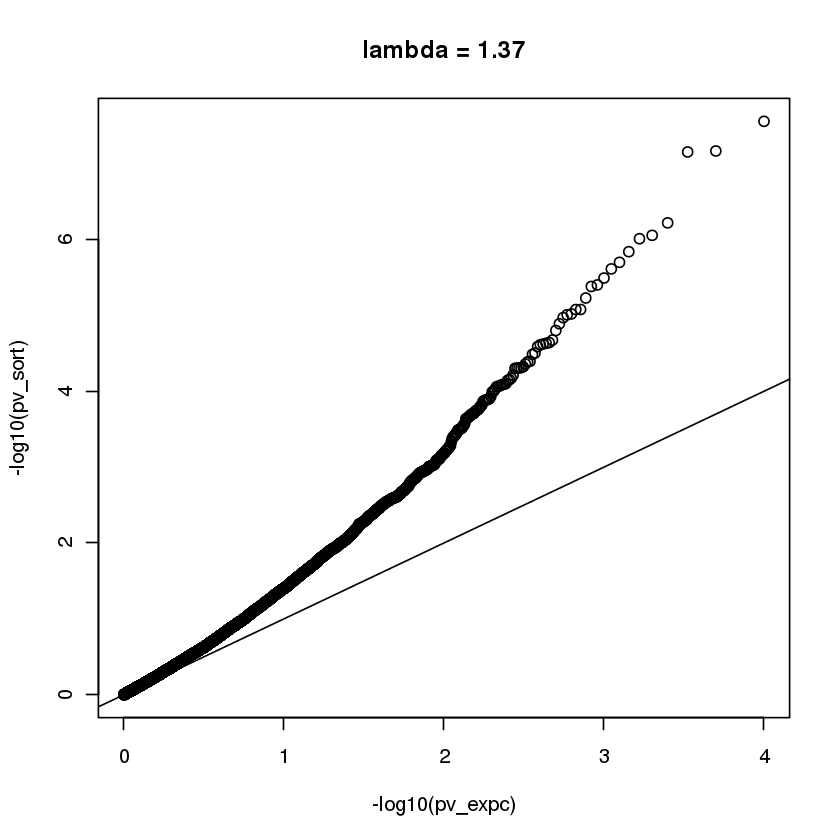

In [2]:
library(sandwich)
test2.func = function(i){
  e = rbinom(n, 2, 0.3)
  y = b0 + b1 * x1 + b2 * x2 + b3 * (x2-30)^2 + rnorm(n, 0, 12)
#   m1= summary(lm(y ~ x1 + x2 + time * e + I(time^2)))
  m1= lm(y ~ x1 + x2 * e )
  t_intraction = m1$coefficients[5]/sqrt(vcovHC(m1, type = "HC")[5,5])
  pv_interaction = 2 * pt(-abs(t_intraction), df = m1$df, lower.tail = T)
  return (pv_interaction)  
}

N_test = 10000
test = mclapply(1:N_test, test2.func) # can use mc.cores > 1 if not windows.
pv_sort = sort(do.call(rbind, test))
pv_expc = (1:N_test)/N_test
plot(-log10(pv_expc), -log10(pv_sort))
abline(0, 1)
lambda = qchisq(1-median(pv_sort),1) / qchisq(1-median(0.5),1)
title(sprintf("lambda = %.2f", lambda))

# With a better model

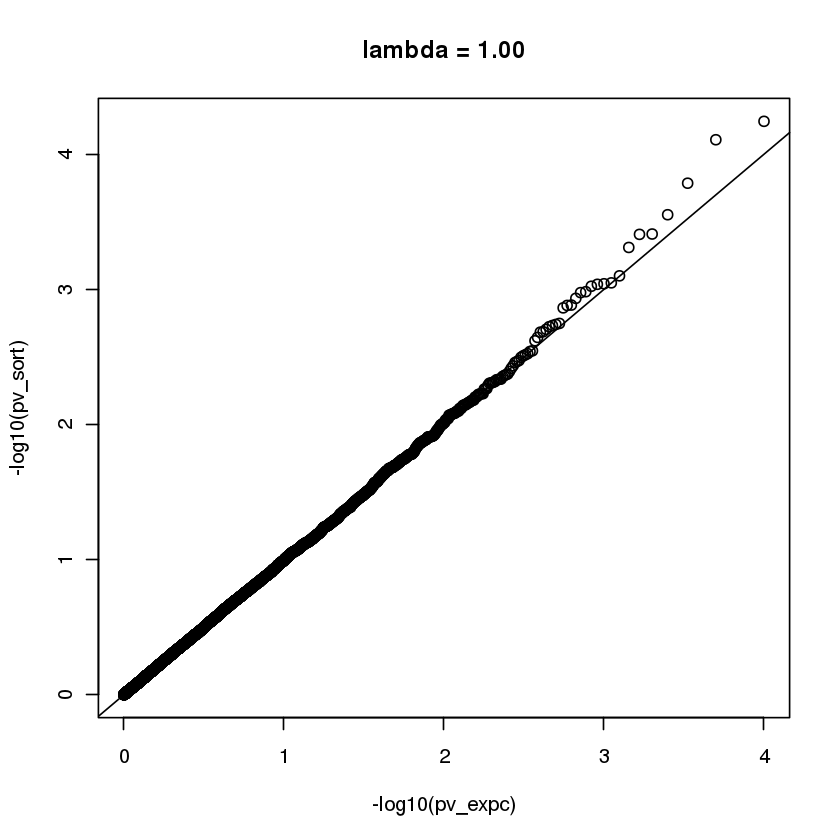

In [3]:
test3.func = function(i){
  e = rbinom(n, 2, 0.3)
  y = b0 + b1 * x1 + b2 * x2 + b3 * (x2-30)^2 + rnorm(n, 0, 12)
  m1= summary(lm(y ~ x1 + x2 * e + I(x2^2)))
  pv_intraction = m1$coefficients[6,4] # pvalue for interaction
  return (pv_intraction)  
}

N_test = 10000
test = mclapply(1:N_test, test3.func) # can use mc.cores > 1 if not windows.
pv_sort = sort(do.call(rbind, test))
pv_expc = (1:N_test)/N_test
plot(-log10(pv_expc), -log10(pv_sort))
abline(0, 1)
lambda = qchisq(1-median(pv_sort),1) / qchisq(1-median(0.5),1)
title(sprintf("lambda = %.2f", lambda))